# Lab 5: RNAfold/plot and Using the Subprocess Module

## Grab Sequences from Penchovsky and Breaker 

#### Table of Gate Information: 

YES-1: (Figure 2a)
seq:GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
OBS: 26-47
Red regions: 16-21, 49-54

NOT-1: (Figure 4a)
seq:GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
OBS: 44-66
Red regions: 40-43, 74-77

AND-1: (Figure 5a)
seq:GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGC GAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
OBS1: 30-45
OBS2: 49-64
Red regions: 16-23, 70-77

OR-1: (Figure 6a)
seq:GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
OBS1: 27-46 
OBS2: 47-66
Red regions: 16-26, 67-77

## Computations:

### Check that RNAfold works in Terminal
Trying it out in Terminal:

    be131-04@ip-172-30-0-167:~> cd Lab_5
    be131-04@ip-172-30-0-167:~/Lab_5> RNAfold

Terminal Returns: 
Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8

Pasted in the following sequence below the numbers: GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC@ - the at-sign (@) is needed to tell the software to stop

Terminal Returns: 
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC@
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))).
 minimum free energy = -33.80 kcal/mol

Input string (upper or lower case); @ to quit
....,....1....,....2....,....3....,....4....,....5....,....6....,....7....,....8

I fold a file called rna.ps in my Lab_5 directory

#### Find Secondary Structure for Gates when OBS not bound

In [1]:
import subprocess
seqs = \
""">seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seq4
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@
"""

p = subprocess.run('RNAfold', 
                   input= bytes(seqs, 'ascii'),
                   stdout= subprocess.PIPE,
                   stderr= subprocess.PIPE)

print("Terminal View")
print(p.stderr.decode())

print("Output File Contents")
print(p.stdout.decode())

Terminal View

Output File Contents
>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>seq4
GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.........))).))).)))...)).))))))..))))))....(((((....))))).)))))))) (-37.50)



#### Find Secondary Structure for Gates When OBS's bind

In terminal ran: 

    >cd Lab_5
    >cat con_gate.txt; RNAfold -C con_gate.txt
   

In [31]:
def cons_gen(name, seq, c1 , c2): 
    count= len(seq)
    end_count= count - (c1 + c2)
    f= open(name +'.txt', "w+")
    f.write(">" + name + "\n")
    f.close()
    
    a= open(name +'.txt', "a+")
    a.write(seq + "\n" + "."*c1 + "x"*c2 +"."*end_count)
    a.close()
    return print(open(name +'.txt', "r+").read())
def two_cons_gen(name, seq, c1 , c2, c3, c4): 
    count= len(seq)
    end_count= count - (c1 + c2 + c3 + c4)
    f= open(name +'.txt', "w+")
    f.write(">" + name + "\n")
    f.close()
    
    a= open(name +'.txt', "a+")
    a.write(seq + "\n" + "."*c1 + "x"*c2 + "."*c3 + "x"*c4 +"."*end_count)
    a.close()
    return print(open(name +'.txt', "r+").read())

#
seq1b= "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"      
seq2b= "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"       


cons_gen("con_yes",seq2b, 25, 22)
cons_gen("con_not", seq2b, 43, 23)

seq3b = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"
seq4b = "GGGCGACCCCUGAUGGCUUGGUUGAGUAUUUACAGCUCCAUAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

two_cons_gen("con_and", seq3b, 29 , 16, 4, 16)
two_cons_gen("1con_and", seq3b, 29 , 16, 20, 0)
two_cons_gen("2con_and", seq3b, 45 , 0, 4, 16)


two_cons_gen("con_or", seq4b, 26 , 20, 0, 20)
two_cons_gen("1con_or", seq4b, 26 , 20, 20, 0)
two_cons_gen("2con_or", seq4b, 26 , 0, 20, 20)


>con_yes
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.........................xxxxxxxxxxxxxxxxxxxxxx.............................................
>con_not
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
...........................................xxxxxxxxxxxxxxxxxxxxxxx..........................
>con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx....xxxxxxxxxxxxxxxx...............................................
>1con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
.............................xxxxxxxxxxxxxxxx...................................................................
>2con_and
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
................

## Results:  

### YES-1 Gate:

#### OBS1 Unbound:

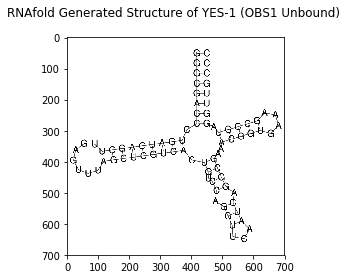

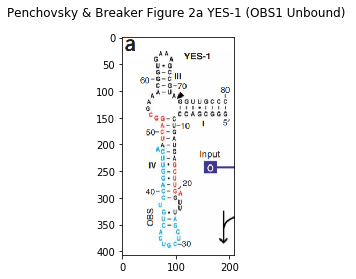

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold YES-1  
yes1_gen = mpimg.imread('seq1_ss.png')
yesgenplot = plt.imshow(yes1_gen)
yesgentitle = plt.title("RNAfold Generated Structure of OBS1 Unbound YES-1 \n")
plt.show()

# Penchovsky & Breaker Figure 1a
yes1 = mpimg.imread('YES_PAPER - Copy.PNG')
yes1plot = plt.imshow(yes1)
yes1title = plt.title("Penchovsky & Breaker Figure 2a OBS1 Unbound YES-1 \n")
plt.show()

In my structure the middle loop is one bp larger. Instead of a long stem II with a bulge and short  stem III in the paper, I rendered a structure with a short continuous stem II where the extra bp form extra stem with a bulge, with short stem III conserved. 

Red regions are not bound to each other therefore off.

A quick skim of the methods shows that gate folding calculated at **37 degrees C** and ours were not specified. They also used a **search algorithm** (choose random confirmers that may or may not be ground) that allowed randomization of the structure when the effectors are not present meaning that slight differences in structure when OBS1 or 2 not bound are to be expected.

#### OBS1 Bound:

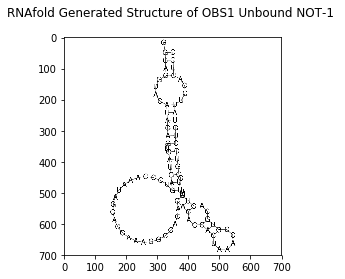

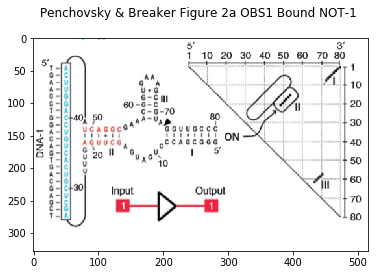

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold YES-1  
yes1_gen_OBS1 = mpimg.imread('1obs_yes.png')
yes_gen_obs1_plot = plt.imshow(yes1_gen_OBS1)
yes_gen_obs1_title = plt.title("RNAfold Generated Structure of OBS1 Unbound YES-1 \n")
plt.show()

# Penchovsky & Breaker Figure 1a
yes1_OBS1 = mpimg.imread('1y_obs.PNG')
yes_obs1_plot = plt.imshow(yes1_OBS1)
yes_obs1_title = plt.title("Penchovsky & Breaker Figure 2a OBS1 Bound YES-1 \n")
plt.show()

There is an extreme differences between the structure they made and running RNAfold made stemming from the generation of an overhang of the first two G’s. 

The red regions are not aligned and the structures is off.


### NOT-1 Gate:

#### OBS1 Unbound:

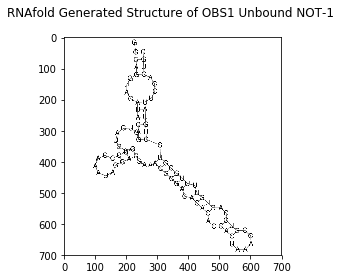

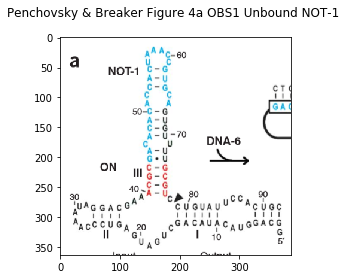

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold NOT-1 
not1_gen = mpimg.imread('seq2_ss.png')
notgenplot = plt.imshow(not1_gen)
notgentitle = plt.title("RNAfold Generated Structure of OBS1 Unbound NOT-1 \n")
plt.show()

# Penchovsky & Breaker Figure 4a
not1 = mpimg.imread('NOT_PAPER.PNG')
not1plot = plt.imshow(not1)
not1title = plt.title("Penchovsky & Breaker Figure 4a OBS1 Unbound NOT-1 \n")
plt.show()




My RNAfold structure and the one in the paper are remarkably similar. 

The red reigons are lined up and is on. 

#### OBS1 Bound:

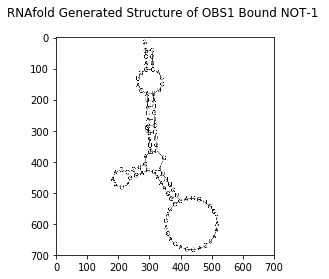

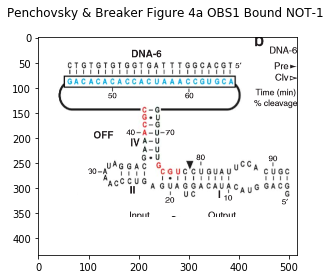

In [13]:
#RNAfold NOT-1 
not1_gen_OBS1 = mpimg.imread('1obs_not.png')
not_gen_obs1_plot = plt.imshow(not1_gen_OBS1)
not_gen_obs1_title = plt.title("RNAfold Generated Structure of OBS1 Bound NOT-1 \n")
plt.show()

# Penchovsky & Breaker
not1_OBS1 = mpimg.imread('1n_obs.PNG')
not_obs1_plot = plt.imshow(not1_OBS1)
not_obs1_title = plt.title("Penchovsky & Breaker Figure 4a OBS1 Bound NOT-1 \n")
plt.show()

Structures are the same and the red reigons are not aligned therefore structure is off. 

### OR-1 Gate:

#### OBS1 and OBS2 Unbound:

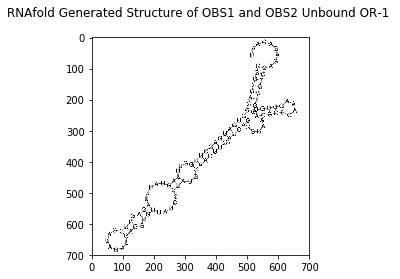

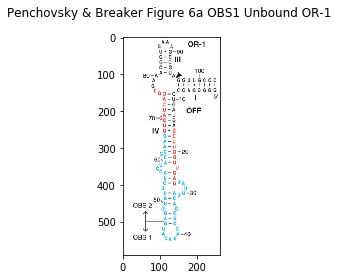

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold OR-1  
or1_gen = mpimg.imread('seq3_ss.png')
orgenplot = plt.imshow(or1_gen)
orgentitle = plt.title("RNAfold Generated Structure of OBS1 and OBS2 Unbound OR-1 \n")
plt.show()

# Penchovsky & Breaker Figure 5a
or1 = mpimg.imread('OR_PAPER.PNG')
or1plot = plt.imshow(or1)
or1title = plt.title("Penchovsky & Breaker Figure 6a OBS1 and OBS2 Unbound OR-1 \n")
plt.show()


Stem II  and stem III structure is completely conserved, however there is a great overhang of stem I that is unmatched in the RNAfold and matched in the paper.  Therefore the first loop is deflated in my model compared to the paper. 

Red region not aligned.

Gate = ON

#### OBS1 and OBS2 Bound:

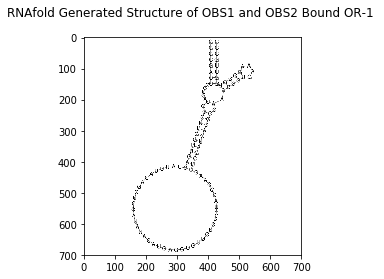

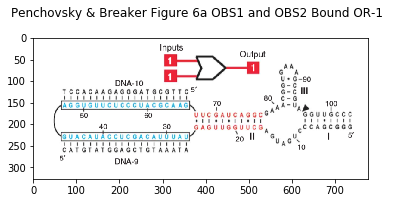

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold OR-1 
or1_gen_OBS12 = mpimg.imread('12obs_or.png')
or_gen_obs12_plot = plt.imshow(or1_gen_OBS12)
or_gen_obs12_title = plt.title("RNAfold Generated Structure of OBS1 and OBS2 Bound OR-1 \n")
plt.show()

or1_OBS12 = mpimg.imread('12o_obs.PNG')
or_obs12_plot = plt.imshow(or1_OBS12)
or_obs12_title = plt.title("Penchovsky & Breaker Figure 6a OBS1 and OBS2 Bound OR-1  \n")
plt.show()


Structures are the same except for the asymmetric loop is now two symmetric ones. 

The red reigons are aligned.

Gate = ON

#### OBS1 Bound and OBS2 Unbound:

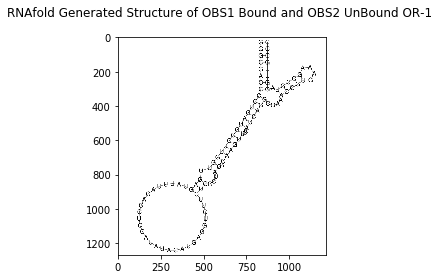

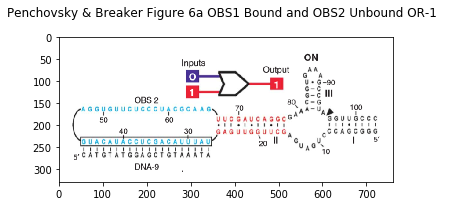

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold OR-1 
or1_gen_OBS12 = mpimg.imread('1obs_or.png')
or_gen_obs12_plot = plt.imshow(or1_gen_OBS12)
or_gen_obs12_title = plt.title("RNAfold Generated Structure of OBS1 Bound and OBS2 UnBound OR-1 \n")
plt.show()

or1_OBS12 = mpimg.imread('1o_obs.PNG')
or_obs12_plot = plt.imshow(or1_OBS12)
or_obs12_title = plt.title("Penchovsky & Breaker Figure 6a OBS1 Bound and OBS2 Unbound OR-1  \n")
plt.show()


Structures are the same except for the loop in my RNAfold is smaller. 

The red reigons are aligned.

Gate = ON

#### OBS1 Unbound and OBS2 Bound:

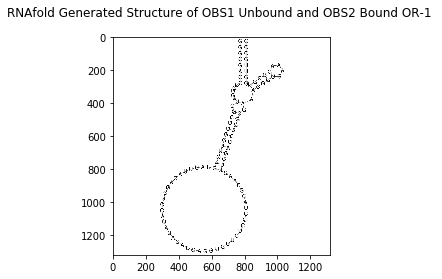

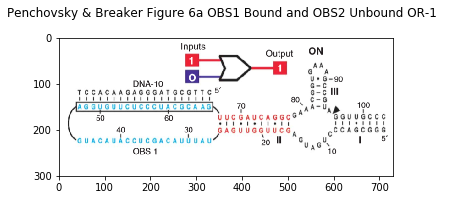

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold OR-1 
or1_OBS2 = mpimg.imread('2obs_or.png')
or_gen_obs2_plot = plt.imshow(or1_OBS2)
or_gen_obs2_title = plt.title("RNAfold Generated Structure of OBS1 Unbound and OBS2 Bound OR-1 \n")
plt.show()


or1_OBS2 = mpimg.imread('2o_obs.PNG')
or_obs2_plot = plt.imshow(or1_OBS2)
or_obs2_title = plt.title("Penchovsky & Breaker Figure 6a OBS1 Bound and OBS2 Unbound OR-1  \n")
plt.show()


Structures are the same except for the loop in my RNAfold is smaller. 

The red reigons are aligned.

Gate = ON

### AND-1 Gate:

#### OBS1 and OBS2 Unbound:

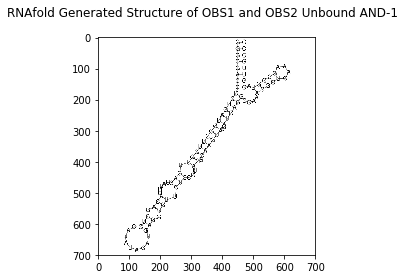

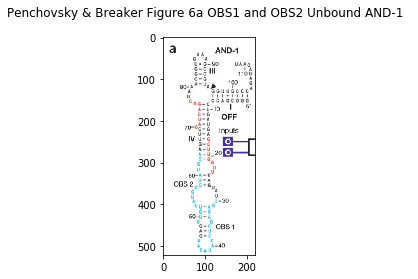

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold AND-1  
and1_gen = mpimg.imread('seq4_ss.png')
andgenplot = plt.imshow(and1_gen)
andgentitle = plt.title("RNAfold Generated Structure of OBS1 and OBS2 Unbound AND-1  \n")
plt.show()

# Penchovsky & Breaker Figure 5a
and1 = mpimg.imread('1AND_PAPER.PNG')
and1plot = plt.imshow(and1)
and1title = plt.title("Penchovsky & Breaker Figure 5a OBS1 and OBS2 Unbound AND-1  \n")
plt.show()

Structures are the same except for the loop in my RNAfold is smaller. 

The red reigons are aligned.

Gate = OFF 

#### OBS1 and OBS2 Bound:

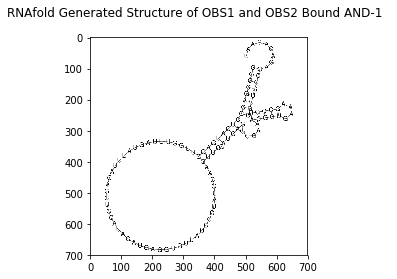

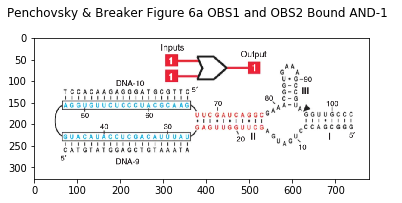

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold AND-1  
and1_gen = mpimg.imread('12obs_and.png')
andgenplot = plt.imshow(and1_gen)
andgentitle = plt.title("RNAfold Generated Structure of OBS1 and OBS2 Bound AND-1  \n")
plt.show()

# Penchovsky & Breaker Figure 5a
and1 = mpimg.imread('12o_obs.PNG')
and1plot = plt.imshow(and1)
and1title = plt.title("Penchovsky & Breaker Figure 5a OBS1 and OBS2 Bound AND-1  \n")
plt.show()

Structures are the same, but there is extra overhang. 

The red reigons are aligned in stem II.

Gate = ON

#### OBS1 Bound and OBS2 Unbound:

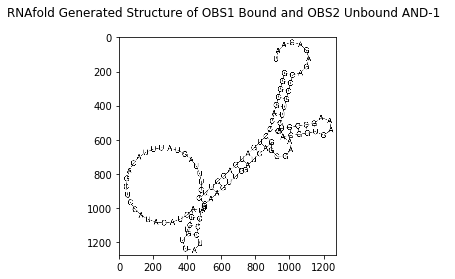

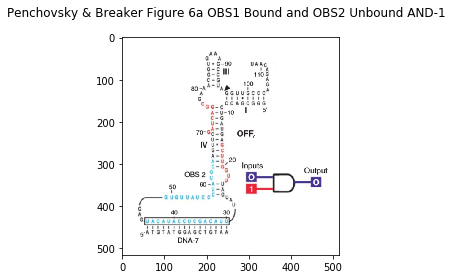

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold AND-1  
and1_gen = mpimg.imread('1obs_and.png')
andgenplot = plt.imshow(and1_gen)
andgentitle = plt.title("RNAfold Generated Structure of OBS1 Bound and OBS2 Unbound AND-1  \n")
plt.show()

# Penchovsky & Breaker Figure 5a
and1 = mpimg.imread('1a_obs.PNG')
and1plot = plt.imshow(and1)
and1title = plt.title("Penchovsky & Breaker Figure 5a OBS1 Bound and OBS2 Unbound AND-1  \n")
plt.show()

Structures are the same like overhang and Stem I except there is an extra stem and loop  for the loop in my RNAfold is smaller. 

The red reigons are aligned.

Gate = OFF

#### OBS1 Unbound and OBS2 Bound:

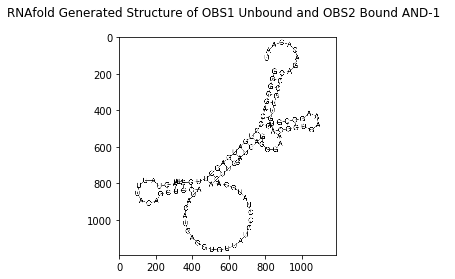

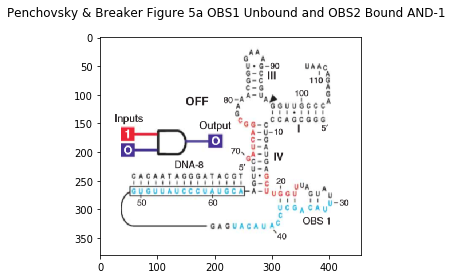

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#RNAfold AND-1 
obs2_and = mpimg.imread('2obs_and.png')
andgenplot = plt.imshow(obs2_and)
andgentitle = plt.title("RNAfold Generated Structure of OBS1 Unbound and OBS2 Bound AND-1  \n")
plt.show()

#Penchovsky & Breaker Figure 5a
and1 = mpimg.imread('2a_obs.PNG')
and1plot = plt.imshow(and1)
and1title = plt.title("Penchovsky & Breaker Figure 5a OBS1 Unbound and OBS2 Bound AND-1  \n")
plt.show()

Structures are the same except for the loops off the large loop, containg OBS I in my RNAfold is more of a stem. 

The red reigons are not aligned.

Gate = OFF

**According to your results, do the AND-1 and OR-1 riboswitches work as the paperclaims?**

I believe they do. Most expected results were returned and the structures of the gates that had to be conserved were coserved, like stem III and the catalytic part of the loop.